# PCOS Prediction

**Table of Contents**

1. Importing Library
2. Loading data
3. 
Data Preprocessig
4. 
Data Visualizaon
5. n
Model Building

In [1]:
#Importing all the libraries required
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd

 **About the data:**

* This dataset contains all physical and clinical parameters to determine PCOS and infertility related issues. There are a total of 44 parameters. 

* This data is collected from 10 different hospitals across Kerala, India.

* The unit used is feet to cm

* Blood pressure entered as systolic and diastolic separately

* RBS means Random glucose test

* Beta-HCG cases are mentioned as Case I and II

* Blood Group indications: A+ = 11, A- = 12, B+ = 13, B- = 14, O+ =15, O- = 16, AB+ =17, AB- = 18


In [2]:
#Loding data into the kernels 

file_path="PCOS_data.csv"

data = pd.read_csv(file_path)

**Steps involved in Data Preprocessing:**

* Merging the two files that are sorted into two based on patients with infertility and without infertility

* Dropping the repeated features
 
* Encoding categorical variables (dtype objects)

* Dealing with missing values 


In [3]:
#Taking a look at the dataset
data.head() 

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


Everything looks alright we can work with this.

Let's head up to the next step and have a further look at the data.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

**<span style="color:teal;"> Encoding categorical variables (dtype objects)</span>**

In [5]:
#Having a look at the data with dtype objects

data["AMH(ng/mL)"].head() 

0    2.07
1    1.53
2    6.63
3    1.22
4    2.26
Name: AMH(ng/mL), dtype: object

In [6]:
#Similarly

data["II    beta-HCG(mIU/mL)"].head()

0      1.99
1      1.99
2    494.08
3      1.99
4    801.45
Name: II    beta-HCG(mIU/mL), dtype: object

After having a look at this info we may conclude that:

* Some numeric data are saved as strings.
* There are some missing values. Namely, Marriage Status (Yrs)& Fast food (Y/N)

In [7]:
#Dealing with categorical values.
#In this database the type objects are numeric values saved as strings.
#So I am just converting it into a numeric value.

data["AMH(ng/mL)"] = pd.to_numeric(data["AMH(ng/mL)"], errors='coerce')
data["II    beta-HCG(mIU/mL)"] = pd.to_numeric(data["II    beta-HCG(mIU/mL)"], errors='coerce')

#Dealing with missing values. 
#Filling NA values with the median of that feature.

data['Marraige Status (Yrs)'].fillna(data['Marraige Status (Yrs)'].median(),inplace=True)
data['II    beta-HCG(mIU/mL)'].fillna(data['II    beta-HCG(mIU/mL)'].median(),inplace=True)
data['AMH(ng/mL)'].fillna(data['AMH(ng/mL)'].median(),inplace=True)
data['Fast food (Y/N)'].fillna(data['Fast food (Y/N)'].median(),inplace=True)

#Clearing up the extra space in the column names (optional)

data.columns = [col.strip() for col in data.columns]

 # Exploratory Data Analysis


**Steps involved in EDA**
* Feature selection based on the correlation factor 
* Patterns Of Length Of The Menstrual Cycle
* Patterns Of BMI 
* Patterns Of Irregularity In Mensuration 
* Number of Follicles
* Some Miscellaneous EDA


**Let's explore features**

In [8]:
# Having a look at some basic statistical details.

data.describe()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,...,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,271.000000,271.000000,0.327172,31.430684,59.637153,156.484835,24.311285,13.802218,73.247689,19.243993,...,0.489834,0.515712,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915
std,156.317519,156.317519,0.469615,5.411006,11.028287,6.033545,4.056399,1.840812,4.430285,1.688629,...,0.500359,0.500216,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381
min,1.000000,1.000000,0.000000,20.000000,31.000000,137.000000,12.417882,11.000000,13.000000,16.000000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,136.000000,136.000000,0.000000,28.000000,52.000000,152.000000,21.641274,13.000000,72.000000,18.000000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,271.000000,271.000000,0.000000,31.000000,59.000000,156.000000,24.238227,14.000000,72.000000,18.000000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,406.000000,406.000000,1.000000,35.000000,65.000000,160.000000,26.634958,15.000000,74.000000,20.000000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,541.000000,541.000000,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


In [9]:
#Added in the recent update. 
#This came upon evaluating the dataset some obvious outliers I am not explaining the process I used. 
#Dropping the outliers. 

data = data[(data["BP _Diastolic (mmHg)"]>20)]
data = data[(data["AMH(ng/mL)"]<40)]
data = data[(data["BP _Systolic (mmHg)"]>20)]
data = data[(data["Endometrium (mm)"]>0)]
data = data[(data["Avg. F size (R) (mm)"]>0)]
data = data[(data["Avg. F size (R) (mm)"]>0)]
data = data[(data["RBS(mg/dl)"]<200)]
data = data[(data["PRG(ng/mL)"]<20)]
data = data[(data["Pulse rate(bpm)"]>20)]
data = data[(data["FSH(mIU/mL)"]<4000)]
data = data[(data["LH(mIU/mL)"]<1500)]
data = data[(data["Cycle(R/I)"]<4.5)]

data.shape

(526, 44)

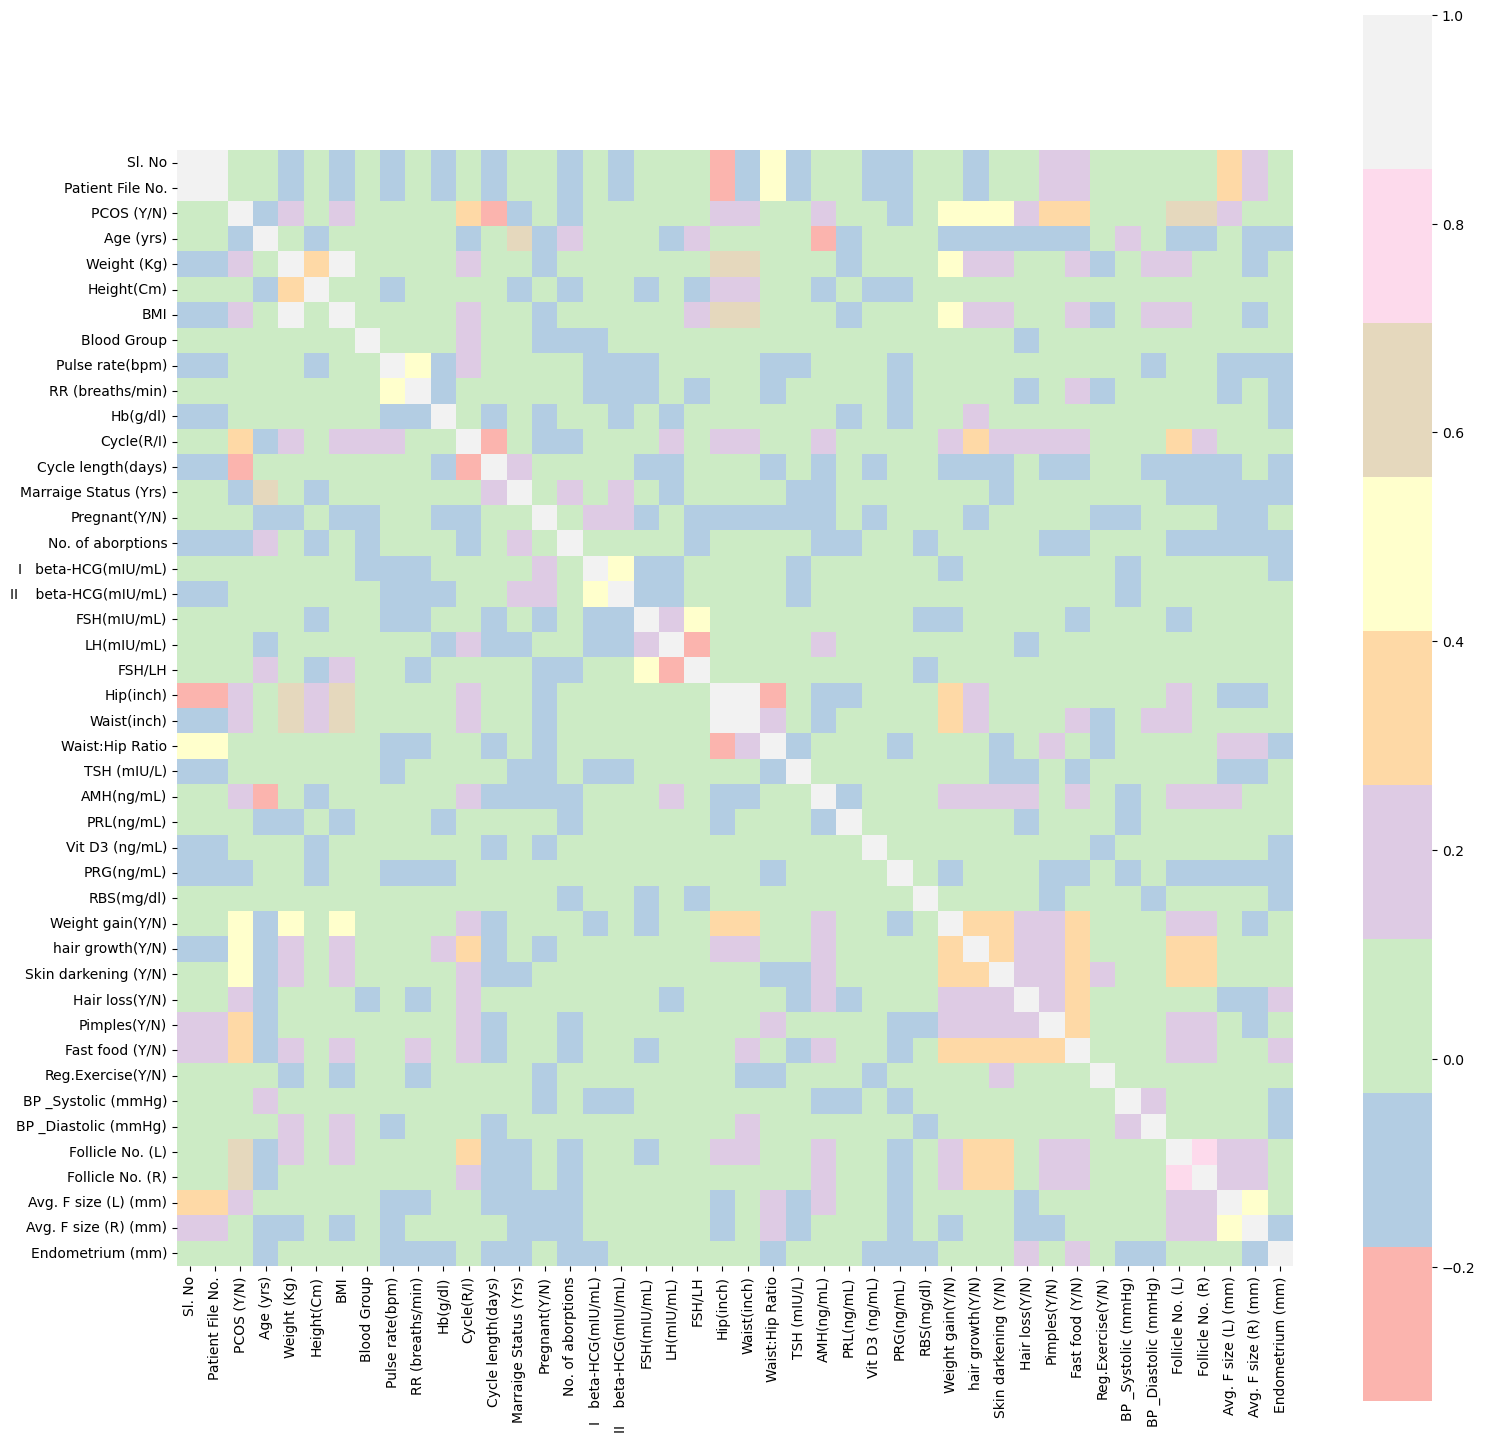

In [10]:
#Examaning a correlation matrix of all the features 

corrmat = data.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap="Pastel1", square=True);

In [11]:
#How all the features correlate with the PCOS 

corrmat["PCOS (Y/N)"].sort_values(ascending=False)

PCOS (Y/N)                1.000000
Follicle No. (R)          0.650915
Follicle No. (L)          0.605305
Skin darkening (Y/N)      0.474561
hair growth(Y/N)          0.463557
Weight gain(Y/N)          0.445646
Cycle(R/I)                0.404082
Fast food (Y/N)           0.376877
Pimples(Y/N)              0.295313
AMH(ng/mL)                0.261105
Weight (Kg)               0.210241
BMI                       0.194121
Hair loss(Y/N)            0.176603
Hip(inch)                 0.163335
Waist(inch)               0.160226
Avg. F size (L) (mm)      0.124990
Pulse rate(bpm)           0.102988
LH(mIU/mL)                0.095426
Hb(g/dl)                  0.094481
Vit D3 (ng/mL)            0.086052
Endometrium (mm)          0.085608
Avg. F size (R) (mm)      0.084756
Height(Cm)                0.075431
Reg.Exercise(Y/N)         0.061816
Sl. No                    0.051936
Patient File No.          0.051936
FSH/LH                    0.043591
Blood Group               0.043032
RR (breaths/min)    

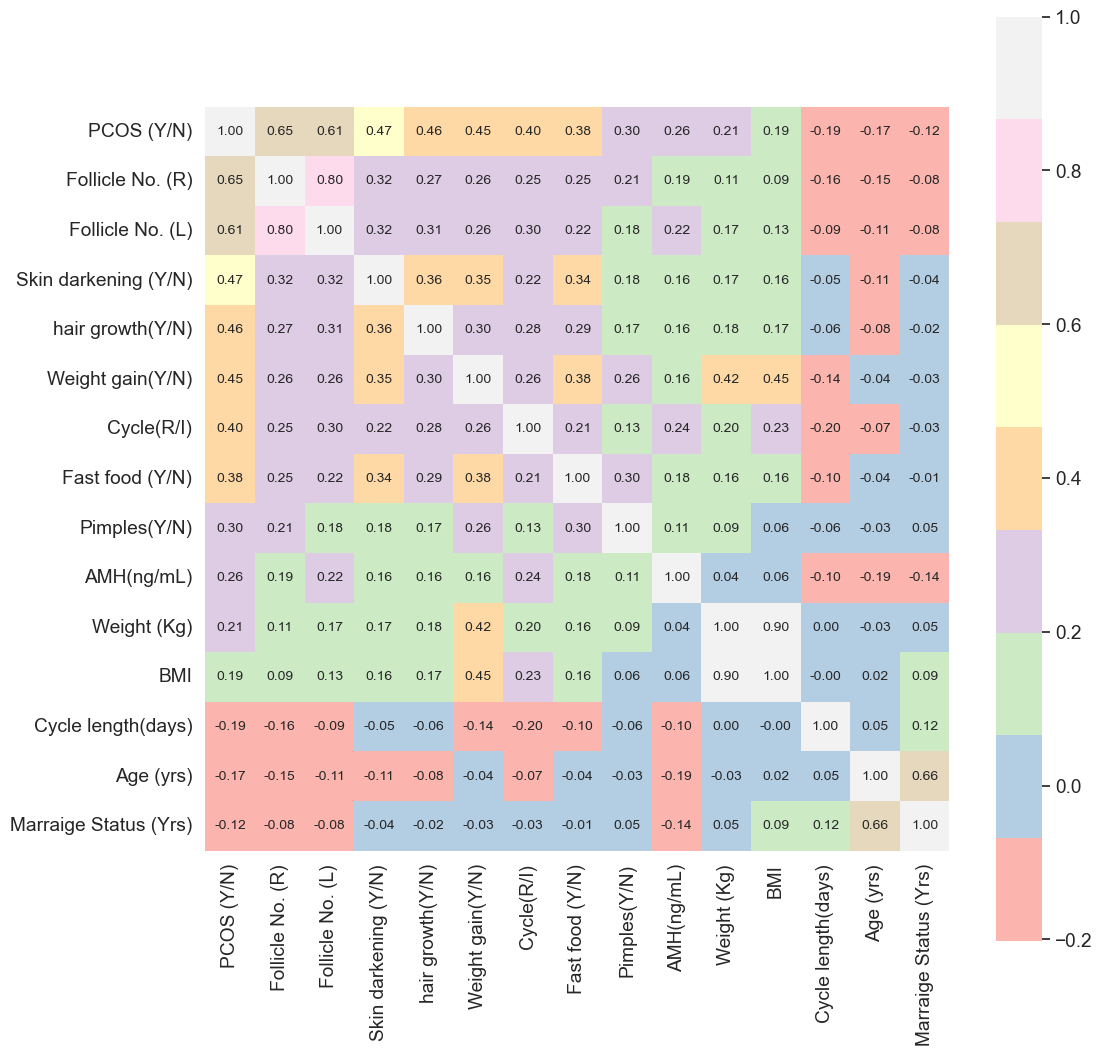

In [12]:
#Having a look at features bearing significant correlation

plt.figure(figsize=(12,12))
k = 12 #number of variables with positive for heatmap
l = 3 #number of variables with negative for heatmap
cols_p = corrmat.nlargest(k, "PCOS (Y/N)")["PCOS (Y/N)"].index 
cols_n = corrmat.nsmallest(l, "PCOS (Y/N)")["PCOS (Y/N)"].index
cols = cols_p.append(cols_n) 

cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True,cmap="Pastel1", annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

 **Patterns Of Length Of The Menstrual Cycle**

C:\Users\Om\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


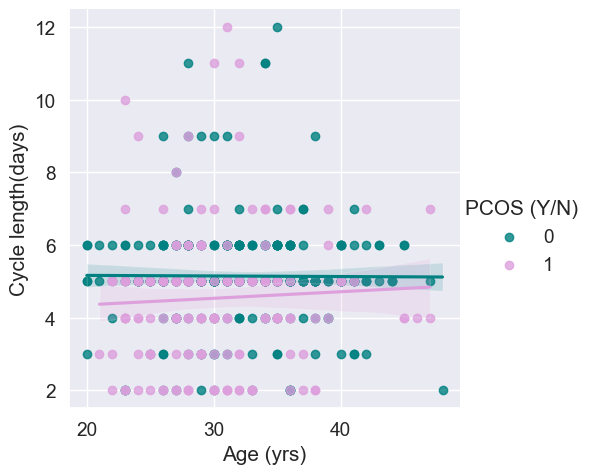

In [13]:
# Length of menstrual phase in PCOS vs normal 
color = ["teal", "plum"]
fig=sns.lmplot(data=data,x="Age (yrs)",y="Cycle length(days)", hue="PCOS (Y/N)",palette=color)
plt.show(fig)

The length of the menstrual phase is overall consistent over different ages for normal cases. Whereas in the case of PCOD the length increased with age. 

 **Patterns Of BMI**

C:\Users\Om\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


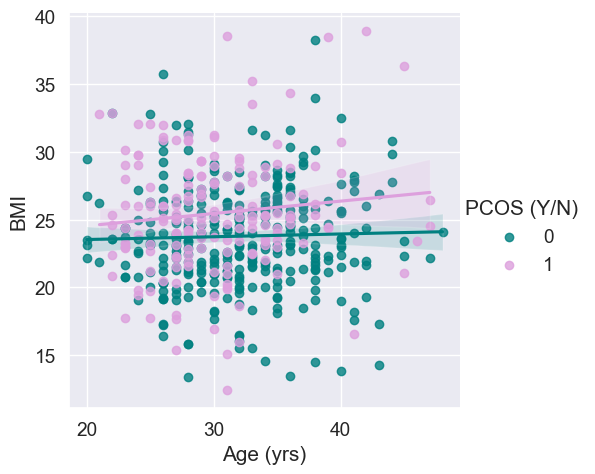

In [14]:
# Pattern of weight gain (BMI) over years in PCOS and Normal. 
fig= sns.lmplot(data =data,x="Age (yrs)",y="BMI", hue="PCOS (Y/N)", palette= color )
plt.show(fig)

Body mass index (BMI) is showing consistency for normal cases. Whereas for PCOS the BMI increases with age.

 **Patterns Of Irregularity In Mensuration**

*There is no clarity on what this feature and its values indicate but,*

**Apparently in the feature "Cycle(R/I)" value:**

**4** indicates irregular menstrual cycle 

**2** indicates a regular menstrual cycle

C:\Users\Om\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


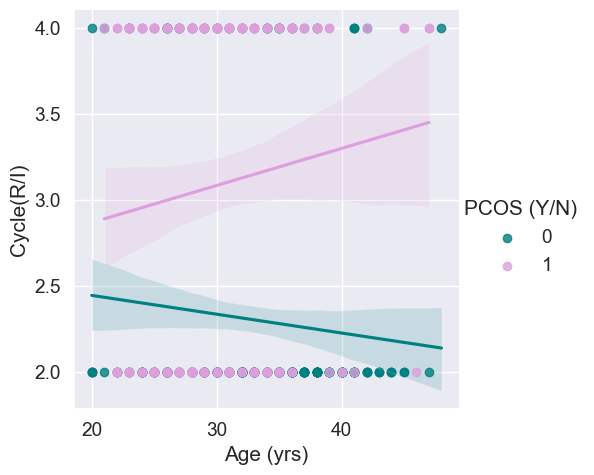

In [15]:
# cycle IR wrt age 
sns.lmplot(data =data,x="Age (yrs)",y="Cycle(R/I)", hue="PCOS (Y/N)",palette=color)
plt.show()

The mensural cycle becomes more regular for normal cases with age. Whereas, for PCOS the irregularity increases with age.

 **Number Of Follicles**

C:\Users\Om\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


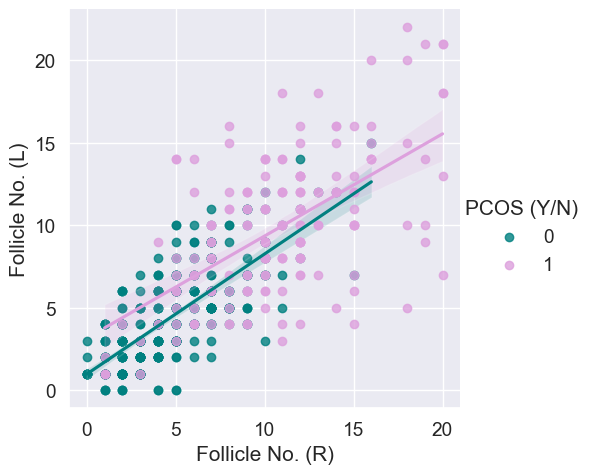

In [16]:
# Distribution of follicles in both ovaries. 
sns.lmplot(data =data,x='Follicle No. (R)',y='Follicle No. (L)', hue="PCOS (Y/N)",palette=color)
plt.show()

The distribution of follicles in both ovaries Left and Right are not equal for women with PCOS in comparison with the "Normal" patient. 
Thia is curious let's exlore it with boxen plot. 

C:\Users\Om\AppData\Local\Temp\ipykernel_10452\2788341060.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["PCOS (Y/N)"], y=data[i], palette=color)
C:\Users\Om\anaconda3\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 31.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


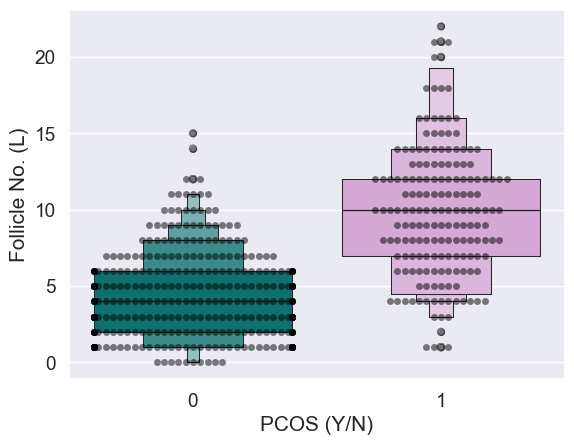

C:\Users\Om\AppData\Local\Temp\ipykernel_10452\2788341060.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["PCOS (Y/N)"], y=data[i], palette=color)
C:\Users\Om\anaconda3\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 29.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


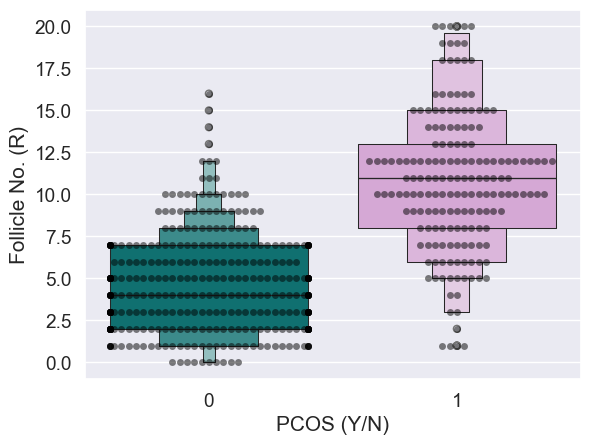

In [17]:
features = ["Follicle No. (L)","Follicle No. (R)"]
for i in features:
    sns.swarmplot(x=data["PCOS (Y/N)"], y=data[i], color="black", alpha=0.5 )
    sns.boxenplot(x=data["PCOS (Y/N)"], y=data[i], palette=color)
    plt.show()

The number of follicles in women with PCOS is higher, as expected. And are unequal as well. 
 
**Some Miscellaneous EDA**

C:\Users\Om\AppData\Local\Temp\ipykernel_10452\215697658.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["PCOS (Y/N)"], y=data[i], palette=color)


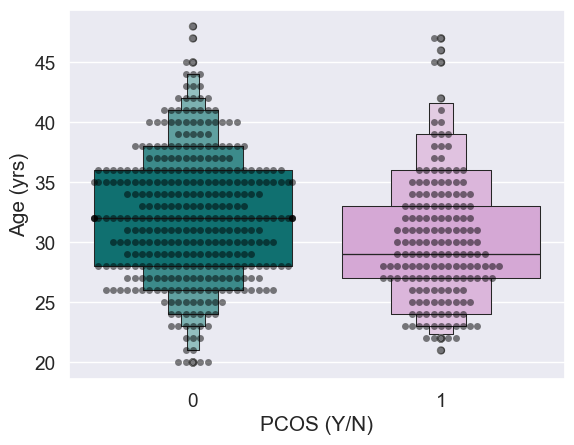

C:\Users\Om\AppData\Local\Temp\ipykernel_10452\215697658.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["PCOS (Y/N)"], y=data[i], palette=color)
C:\Users\Om\anaconda3\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 7.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


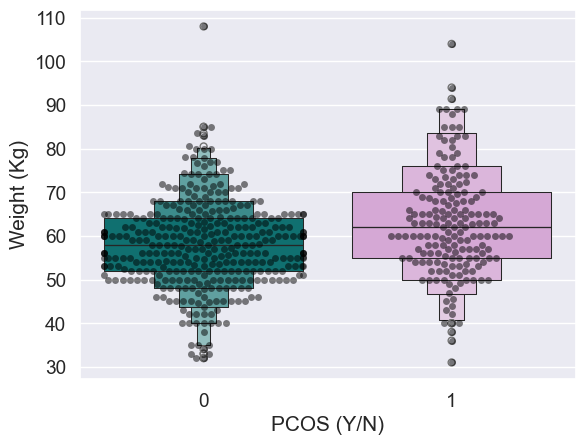

C:\Users\Om\AppData\Local\Temp\ipykernel_10452\215697658.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["PCOS (Y/N)"], y=data[i], palette=color)


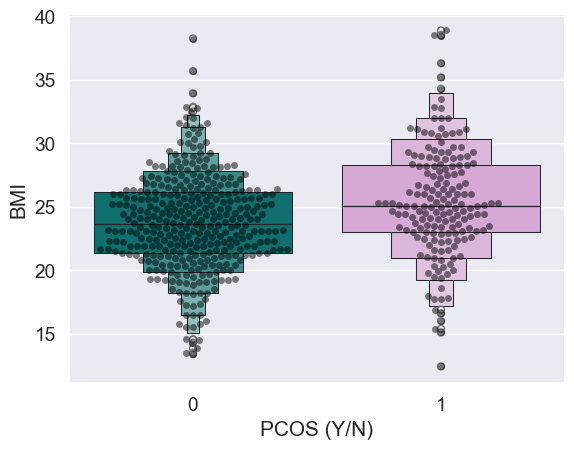

C:\Users\Om\AppData\Local\Temp\ipykernel_10452\215697658.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["PCOS (Y/N)"], y=data[i], palette=color)
C:\Users\Om\anaconda3\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 20.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


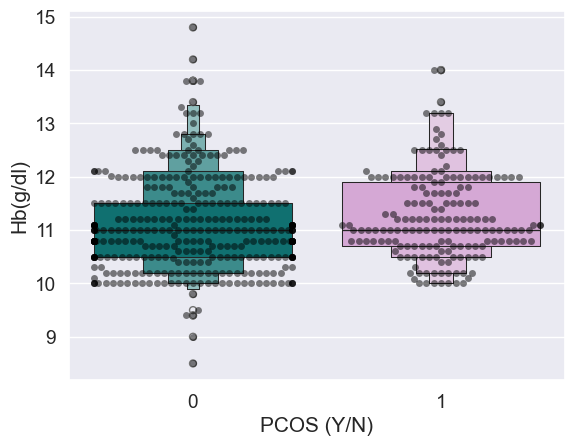

C:\Users\Om\anaconda3\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 52.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Om\anaconda3\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 6.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Om\AppData\Local\Temp\ipykernel_10452\215697658.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["PCOS (Y/N)"], y=data[i], palette=color)
C:\Users\Om\anaconda3\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 65.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Om\anaconda3\lib\si

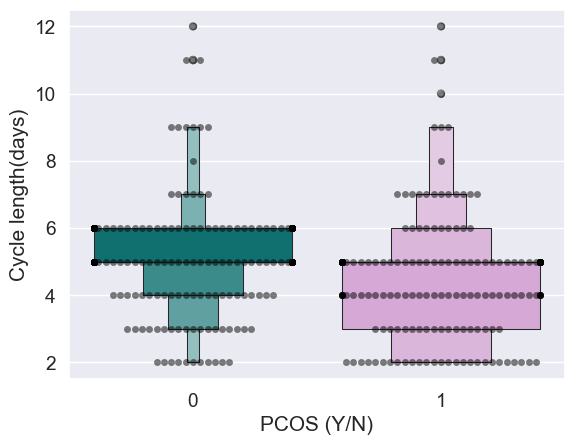

C:\Users\Om\AppData\Local\Temp\ipykernel_10452\215697658.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["PCOS (Y/N)"], y=data[i], palette=color)
C:\Users\Om\anaconda3\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 9.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


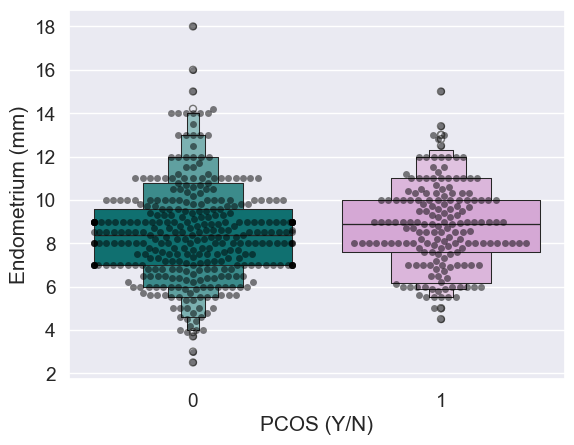

In [18]:
features = ["Age (yrs)","Weight (Kg)", "BMI", "Hb(g/dl)", "Cycle length(days)","Endometrium (mm)" ]
for i in features:
    sns.swarmplot(x=data["PCOS (Y/N)"], y=data[i], color="black", alpha=0.5 )
    sns.boxenplot(x=data["PCOS (Y/N)"], y=data[i], palette=color)
    plt.show()

 # Model Building

**Steps involved in Model Building:**

* Assigning values to features as X and target as y
* Strategic split test and training sets
* Fitting a vanilla model as the base Random Forest model
* Hyperparameter tuning using GridSearch CV
* Fitting the final model 
* Evaluating the confusion matrix
* Evaluating the classification report

In [19]:
#Assiging the features (X)and target(y)

X = pd.concat([data.iloc[:,3:4],data.iloc[:,6:7],data.iloc[:,12:16],data.iloc[:,32:34],data.iloc[:,39:41]],axis=1) #droping out index from features too
y = data.iloc[:,2:3]

#Strategic splitting the data into test and training sets

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y) 

In [20]:
y['PCOS (Y/N)'].value_counts()

PCOS (Y/N)
0    353
1    173
Name: count, dtype: int64

In [21]:
y_train['PCOS (Y/N)'].value_counts()

PCOS (Y/N)
0    282
1    138
Name: count, dtype: int64

In [22]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 526 entries, 0 to 540
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age (yrs)              526 non-null    int64  
 1   BMI                    526 non-null    float64
 2   Cycle length(days)     526 non-null    int64  
 3   Marraige Status (Yrs)  526 non-null    float64
 4   Pregnant(Y/N)          526 non-null    int64  
 5   No. of aborptions      526 non-null    int64  
 6   Skin darkening (Y/N)   526 non-null    int64  
 7   Hair loss(Y/N)         526 non-null    int64  
 8   Follicle No. (L)       526 non-null    int64  
 9   Follicle No. (R)       526 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 45.2 KB


In [23]:
X_train.head()

,Age (yrs),BMI,Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of aborptions,Skin darkening (Y/N),Hair loss(Y/N),Follicle No. (L),Follicle No. (R)
374,32,25.100000,6,11.0,1,0,0,0,1,2
105,25,21.172840,5,4.0,1,0,1,0,12,8
36,37,29.242109,7,12.0,0,0,0,0,6,2
90,44,29.802916,5,22.0,0,2,0,0,4,2
121,33,21.913806,5,12.0,0,0,0,0,1,1


 **Fitting the Model**
 
Using **Hyperparametirezed** tuned parameters

In [24]:
#Fitting the RandomForestClassifier to the training set

rfc = RandomForestClassifier(criterion = 'gini',
 max_depth = 12,
 n_estimators = 200)

rfc.fit(X_train, y_train)

#Making prediction and checking the test set

predictions = rfc.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(accuracy)

C:\Users\Om\anaconda3\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.8301886792452831


**Classification Report & Confusion Matrix**

In [25]:
classi_report = classification_report(y_test, predictions)
print(classi_report)

              precision    recall  f1-score   support

           0       0.85      0.90      0.88        71
           1       0.77      0.69      0.73        35

    accuracy                           0.83       106
   macro avg       0.81      0.79      0.80       106
weighted avg       0.83      0.83      0.83       106



<Axes: >

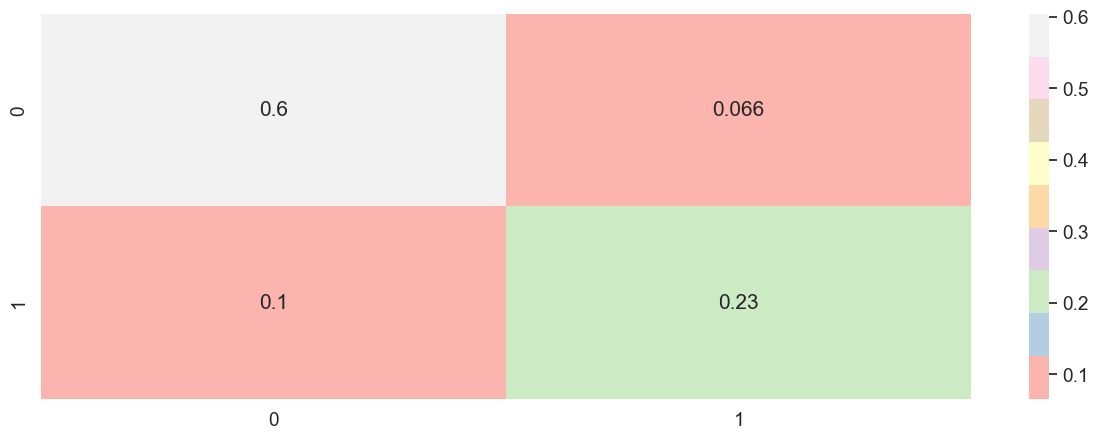

In [26]:
# cofusion matrix
plt.subplots(figsize=(15,5))
cf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot = True, annot_kws = {'size':15}, cmap = 'Pastel1')

### Average accuracy of model = 85%